In [1]:
# import libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading data with pandas
data = pd.read_csv('iris.csv')

In [3]:
# checking head of data
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# check shape of data
data.shape

(150, 5)

# 👉 Exploratory Data Analysis

## Option 1: Pandas Profiling

In [5]:
from pandas_profiling import ProfileReport
profile = ProfileReport(data)
profile

Summarize dataset:   0%|          | 0/19 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Option 2: SweetViz

In [6]:
import sweetviz as sv
report = sv.analyze(data)
report.show_html('iris.html')

                                             |                                             | [  0%]   00:00 ->…

Report iris.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# 👉 Modeling

In [7]:
from pycaret.classification import *
s = setup(data, target = 'species', session_id = 123)

,Description,Value
0,session_id,123
1,Target,species
2,Target Type,Multiclass
3,Label Encoded,"Iris-setosa: 0, Iris-versicolor: 1, Iris-virginica: 2"
4,Original Data,"(150, 5)"
5,Missing Values,False
6,Numeric Features,4
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [8]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.9809,0.9969,0.9833,0.9857,0.9809,0.9715,0.9739,0.0080
knn,K Neighbors Classifier,0.9800,0.9830,0.9806,0.9800,0.9800,0.9697,0.9697,0.0540
qda,Quadratic Discriminant Analysis,0.9709,0.9969,0.9750,0.9782,0.9709,0.9566,0.9602,0.0080
lr,Logistic Regression,0.9609,0.9921,0.9611,0.9622,0.9596,0.9403,0.9422,0.2000
nb,Naive Bayes,0.9609,0.9938,0.9611,0.9652,0.9605,0.9407,0.9432,0.0120
gbc,Gradient Boosting Classifier,0.9609,0.9782,0.9611,0.9723,0.9579,0.9402,0.9476,0.1040
dt,Decision Tree Classifier,0.9509,0.9616,0.9500,0.9598,0.9479,0.9249,0.9309,0.0120
et,Extra Trees Classifier,0.9509,0.9890,0.9528,0.9532,0.9509,0.9258,0.9269,0.2070
lightgbm,Light Gradient Boosting Machine,0.9418,0.9876,0.9417,0.9459,0.9414,0.9119,0.9141,0.0270
rf,Random Forest Classifier,0.9409,0.9875,0.9417,0.9422,0.9396,0.9100,0.9119,0.2290


In [9]:
# check hold-out score
predict_model(best_model);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Linear Discriminant Analysis,0.9783,1.0000,0.9815,0.9802,0.9785,0.9666,0.9673


# 👉 Model Analysis

## ROC-AUC Plot

A ROCAUC (Receiver Operating Characteristic/Area Under the Curve) plot allows the user to visualize the tradeoff between the classifier’s sensitivity and specificity.

The Receiver Operating Characteristic (ROC) is a measure of a classifier’s predictive quality that compares and visualizes the tradeoff between the model’s sensitivity and specificity. When plotted, a ROC curve displays the true positive rate on the Y axis and the false positive rate on the X axis on both a global average and per-class basis. The ideal point is therefore the top-left corner of the plot: false positives are zero and true positives are one.

This leads to another metric, area under the curve (AUC), which is a computation of the relationship between false positives and true positives. The higher the AUC, the better the model generally is. However, it is also important to inspect the “steepness” of the curve, as this describes the maximization of the true positive rate while minimizing the false positive rate.

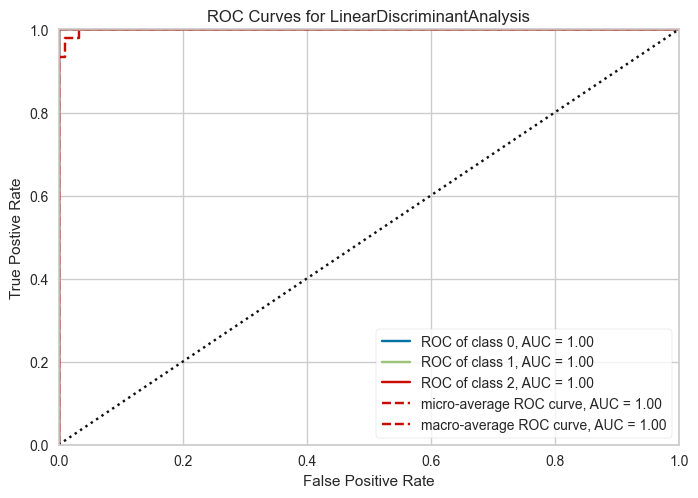

In [10]:
plot_model(best_model, plot = 'auc')

## Confusion Matrix
The ConfusionMatrix visualizer is a ScoreVisualizer that takes a fitted scikit-learn classifier and a set of test X and y values and returns a report showing how each of the test values predicted classes compare to their actual classes. Data scientists use confusion matrices to understand which classes are most easily confused. These provide similar information as what is available in a ClassificationReport, but rather than top-level scores, they provide deeper insight into the classification of individual data points.

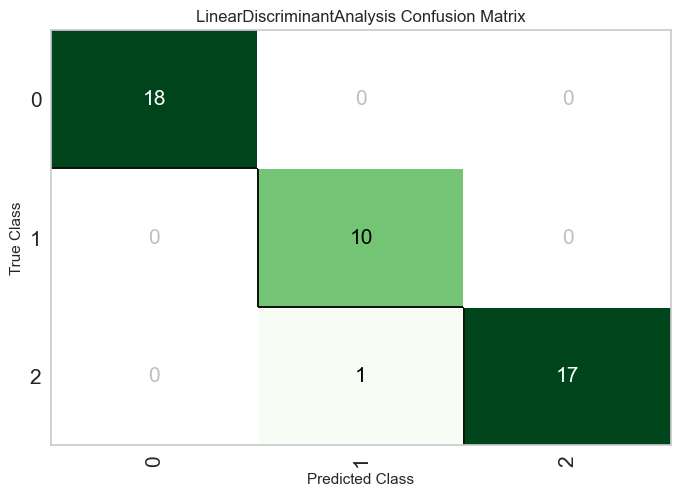

In [11]:
plot_model(best_model, plot = 'confusion_matrix')

## Precision Recall Curve
The PrecisionRecallCurve shows the tradeoff between a classifier’s precision, a measure of result relevancy, and recall, a measure of completeness. For each class, precision is defined as the ratio of true positives to the sum of true and false positives, and recall is the ratio of true positives to the sum of true positives and false negatives.

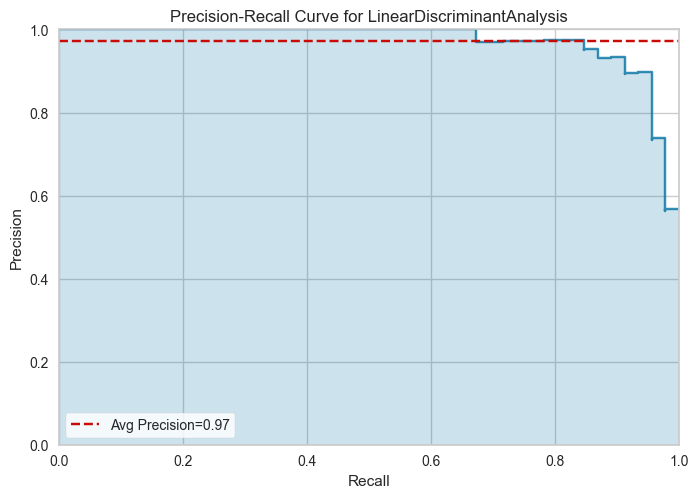

In [12]:
plot_model(best_model, plot = 'pr')

## Decision Boundary

The DecisionBoundariesVisualizer is a bivariate data visualization algorithm that plots the decision boundaries of each class.

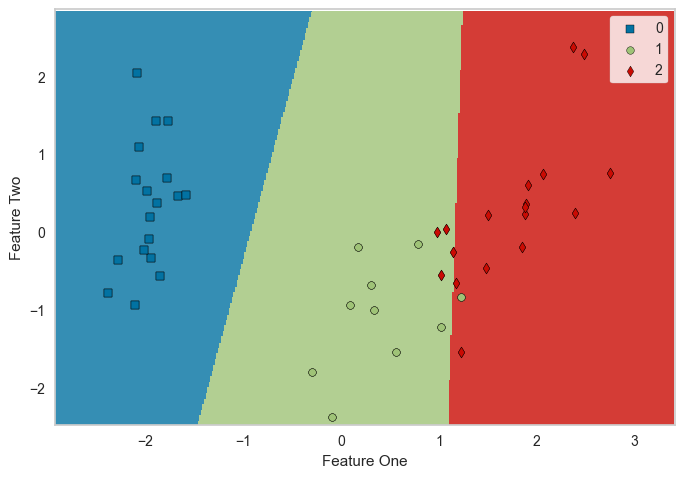

In [13]:
plot_model(best_model, plot = 'boundary')

## Learning Curve

A learning curve shows the relationship of the training score versus the cross validated test score for an estimator with a varying number of training samples. This visualization is typically used to show two things:

How much the estimator benefits from more data (e.g. do we have “enough data” or will the estimator get better if used in an online fashion).

If the estimator is more sensitive to error due to variance vs. error due to bias.

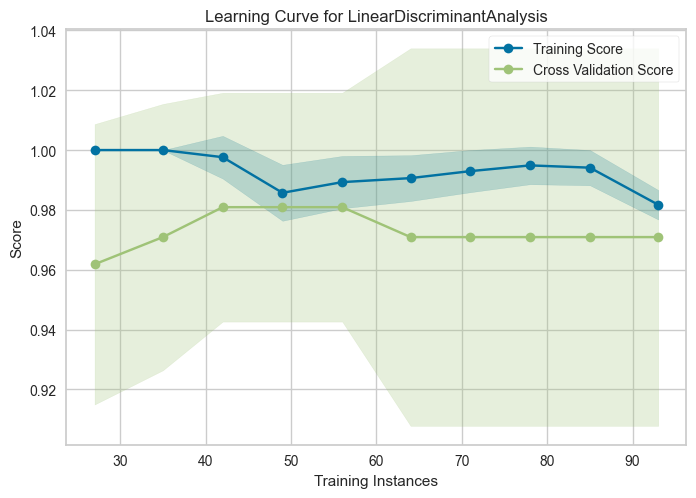

In [18]:
plot_model(best_model, plot = 'learning')

## Feature Importance

Shows the top 10 important features for model. 

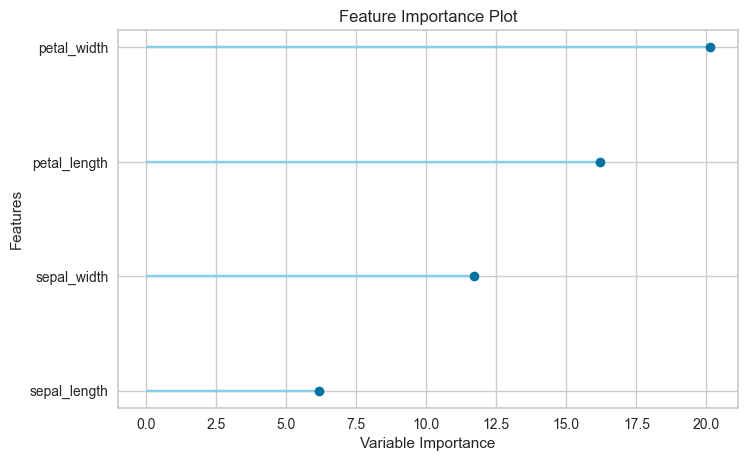

In [19]:
plot_model(best_model, plot = 'feature')

# 👉 Interpret Model

In [20]:
# create a lightgbm model
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9091,1.0000,0.8889,0.9273,0.9051,0.8608,0.8721
3,0.9091,1.0000,0.9167,0.9318,0.9091,0.8642,0.8750
4,0.8000,0.9690,0.8056,0.8000,0.8000,0.6970,0.6970
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
9,0.8000,0.9071,0.8056,0.8000,0.8000,0.6970,0.6970


## SHAP Summary Plot

The summary plot combines feature importance with feature effects. Each point on the summary plot is a Shapley value for a feature and an instance. The position on the y-axis is determined by the feature and on the x-axis by the Shapley value. The color represents the value of the feature from low to high. Overlapping points are jittered in y-axis direction, so we get a sense of the distribution of the Shapley values per feature. The features are ordered according to their importance.

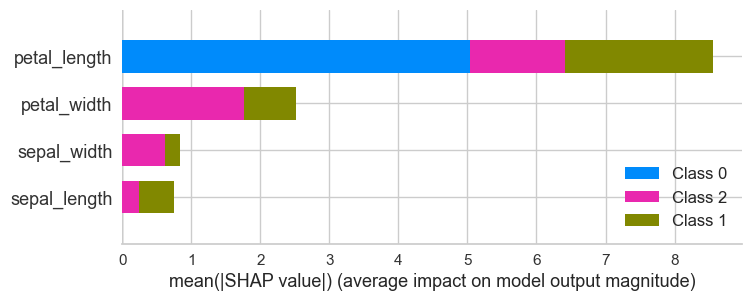

In [21]:
interpret_model(lightgbm)

# 👉 Predict New Observations

In [22]:
new_data = data.copy()
new_data.drop(['species'], axis=1, inplace=True)
new_data.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
# finalize means fit the entire pipeline on entire dataset including test data
# this should be the last step of your modeling (not mandatory)

final_best_model = finalize_model(best_model)

In [29]:
predictions = predict_model(final_best_model, data=new_data, encoded_labels=False)
predictions.head()

,sepal_length,sepal_width,petal_length,petal_width,Label,Score
0,5.1,3.5,1.4,0.2,Iris-setosa,1.0
1,4.9,3.0,1.4,0.2,Iris-setosa,1.0
2,4.7,3.2,1.3,0.2,Iris-setosa,1.0
3,4.6,3.1,1.5,0.2,Iris-setosa,1.0
4,5.0,3.6,1.4,0.2,Iris-setosa,1.0


# 👉 Save / Load Pipeline with PyCaret

In [30]:
save_model(final_best_model, 'pycaret_multiclass_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='species',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                 ('dummy', Dummify(target='species')),
                 ('fix_perfect', Remove_100(target='species')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 (

In [31]:
loaded_pycaret_pipeline = load_model('pycaret_multiclass_pipeline')
print(loaded_pycaret_pipeline)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='species',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                ('dummy', Dummify(target='species')),
                ('fix_perfect', Remove_100(target='species')),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select', 'passthrough'), ('fix_multi

In [32]:
# display as image
from sklearn import set_config
set_config(display = 'diagram')

In [33]:
loaded_pycaret_pipeline

Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=[],
                                      display_types=True, features_todrop=[],
                                      id_columns=[],
                                      ml_usecase='classification',
                                      numerical_features=[], target='species',
                                      time_features=[])),
                ('imputer',
                 Simple_Imputer(categorical_strategy='not_available',
                                fill_value_categorical=None,
                                fill_value_numerical=None,
                                numeric_stra...
                ('dummy', Dummify(target='species')),
                ('fix_perfect', Remove_100(target='species')),
                ('clean_names', Clean_Colum_Names()),
                ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                ('dfs', 'passthrough'), ('pca', 'passthrough'),
                ['trained_model',
                 LinearDiscriminantAnalysis(n_components=None, priors=None,
                                            shrinkage=None, solver='svd',
                                            store_covariance=False,
                                            tol=0.0001)]],
         verbose=False)